In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns
sns.set(font=['TakaoPGothic'], font_scale=1.5)
import numpy as np
import pandas as pd

In [2]:
from glob import glob

msecs = list()
for jsonl in glob('../results/sample_dataset/*/predictions.jsonl'):
    df = pd.read_json(jsonl, orient='records', lines=True)
    df = df[['model', 'framework', 'msec']]
    msecs.append(df)
msecs = pd.concat(msecs, axis=0).sort_values(['model', 'framework'])

Text(0.5, 1.0, 'Elapsed time')

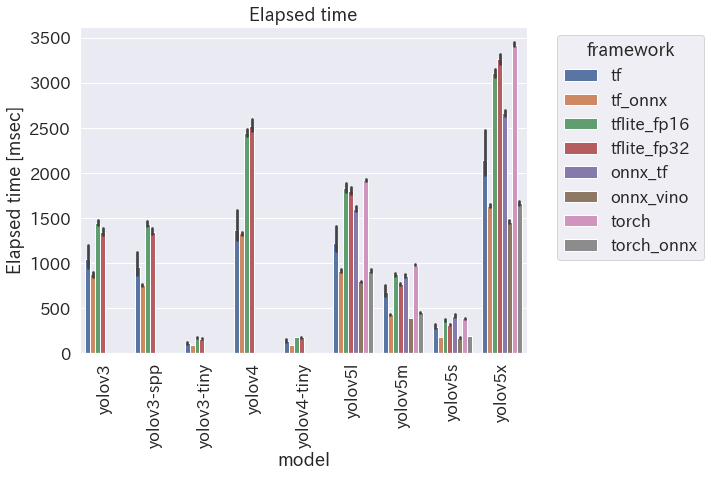

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.barplot(
    data=msecs,
    x='model', y='msec', hue='framework', ax=ax
)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", title='framework')
plt.xticks(rotation=90)
plt.ylabel('Elapsed time [msec]')
plt.title('Elapsed time')

In [4]:
accuracies = list()
for jsonl in glob('../results/sample_dataset/*/scores.jsonl'):
    df = pd.read_json(jsonl, orient='records', lines=True)
    model_framework = jsonl.split('/')[-2]
    model_framework = model_framework.split('_')
    model = model_framework[0]
    framework = '_'.join(model_framework[1:])
    df = df.assign(model=[model] * df.shape[0])
    df = df.assign(framework=[framework] * df.shape[0])
    accuracies.append(df)
accuracies = pd.concat(accuracies, axis=0).sort_values(['model', 'framework'])

Text(0.5, 1.0, 'mAP (iou=0.50:0.95:0.05)')

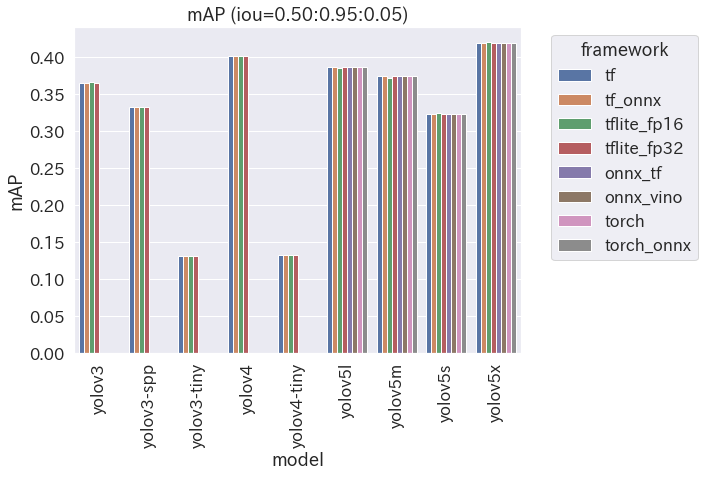

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.barplot(
    data=accuracies.loc[np.logical_and(
        accuracies['metric'] == 'macro mAP',
        accuracies['iou_threshold'] == '0.50:0.95'
    ), :],
    x='model', y='score', hue='framework', ax=ax
)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", title='framework')
plt.xticks(rotation=90)
plt.ylabel('mAP')
plt.title('mAP (iou=0.50:0.95:0.05)')

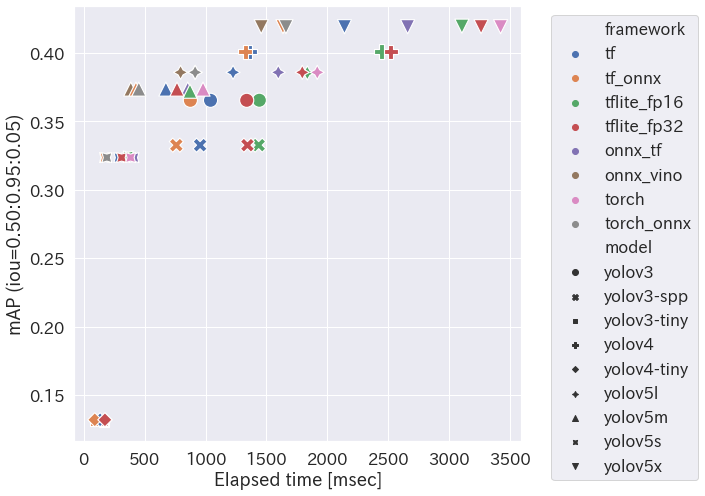

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
sns.scatterplot(
    data = pd.merge(
        msecs.groupby(['model', 'framework']).mean(),
        accuracies.loc[np.logical_and(
            accuracies['metric'] == 'macro mAP',
            accuracies['iou_threshold'] == '0.50:0.95'
        ), :].groupby(['model', 'framework']).mean(),
        how='inner', left_index=True, right_index=True
    ).reset_index(),
    x='msec', y='score', style='model', hue='framework', s=200, ax=ax
)
plt.xlabel('Elapsed time [msec]')
plt.ylabel('mAP (iou=0.50:0.95:0.05)')
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")